In [1]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from model.Portfolio import Portfolio
from model.Optimizer import Optimizer

In [18]:
names = ["VUSA", "A35", "S59", "BAB", "IWDA", "Z74", "ES3", "VWRD", "C38U", "V01", "N2IU", "BTC"]

p = Portfolio()

# Set risk-free investment as 2%, approximately SSB's returns
p.rf = 0.02

# Add all assets
for name in names:
    p.addAsset(f"data/{name}.csv", name)

# Convert non SGD assets to SGD
p.addExchangeRate("data/forex/SGDEUR.csv", "EUR", True)
p.addExchangeRate("data/forex/USDSGD.csv", "USD", False)
p.exchangeAdjustment(0, "EUR")
p.exchangeAdjustment(3, "USD")
p.exchangeAdjustment(4, "USD")
p.exchangeAdjustment(7, "USD")
p.exchangeAdjustment(11, "USD")

In [19]:
currentReal = [
    10310,
    22233,
    2820,
    25345,
    7105,
    1760,
    20496,
    6299,
    1596,
    1396,
    1632,
    0
]

currentWeight = np.array(currentReal)/np.sum(currentReal)
currentResult, currentBtPlot = p.backtest(currentWeight, rebalancePeriod=90)

In [20]:
currentResult

{'dateStart': Timestamp('2013-06-05 00:00:00'),
 'dateEnd': Timestamp('2019-06-13 00:00:00'),
 'days': 2199,
 'valueStart': 100000.0,
 'valueEnd': 142862.0030623794,
 'sharpe': 0.7086946135402361,
 'drawdown': 0.0,
 'drawdownPeriod': 0,
 'moneydown': 0.0,
 'maxDrawdown': 7.333604796226825,
 'maxDrawdownPeriod': 317,
 'maxMoneydown': 8771.399036356248,
 'averageReturns': 0.05333089121000677,
 'standardDeviation': 0.047031387812452155,
 'positiveYears': 6,
 'negativeYears': 1,
 'noChangeYears': 0,
 'bestYearReturns': 0.1263618362212673,
 'worstYearReturns': -0.01457637090944608}

<IPython.core.display.Javascript object>


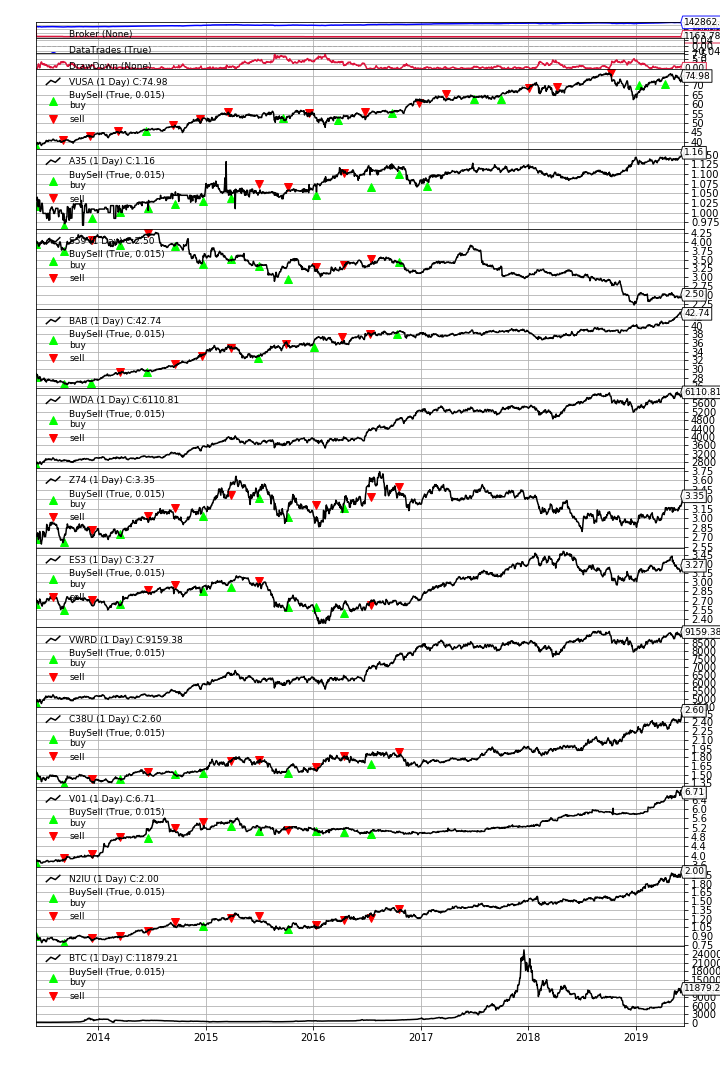

[[<Figure size 720x1080 with 15 Axes>]]

In [21]:
plt.rcParams["figure.figsize"] = 10, 15
currentBtPlot()

In [22]:
o = Optimizer(p)
optimisedWeight, tests = o.kfoldTs(10)

In [23]:
optimisedWeight

[0.1790295371350736,
 0.11264459808635743,
 0.02475544595210125,
 0.34406855453065227,
 0.013797684530459344,
 0.012190588395638437,
 0.010019021477031775,
 7.500935284589089e-13,
 0.014562332692093314,
 0.21266852715991788,
 0.07094851376839648,
 0.005315196295024107]

In [24]:
tests

{'sharpeRaw': [25.65200217424219,
  15.853083519545056,
  -15.799388500257022,
  3.0259667718789247,
  29.481894205728914,
  7.511043120450102,
  46.416601046182876,
  6.18561589948925,
  -8.633371581501788,
  150.30972509738206],
 'sharpeAvg': 26.00031717531406,
 'sharpeStd': 44.93758650340345,
 'weightsRaw': [array([0.46190269, 0.04417276, 0.13490623, 0.04303502, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.29845971,
         0.        , 0.01752359]),
  array([0.20528721, 0.08029   , 0.08870625, 0.24602941, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.32402424,
         0.05440979, 0.0012531 ]),
  array([1.83832737e-01, 9.50199528e-02, 1.01627031e-02, 3.93917780e-01,
         0.00000000e+00, 2.35424337e-02, 0.00000000e+00, 4.91617421e-13,
         1.51417141e-02, 1.96654033e-01, 8.17286467e-02, 3.95113295e-12]),
  array([2.03387779e-01, 9.04804080e-02, 0.00000000e+00, 4.03172825e-01,
         0.00000000e+00, 4.65430147e-02, 0.000000

In [25]:
optimisedResults, optimisedBtPlot = p.backtest(optimisedWeight, rebalancePeriod=130)

In [26]:
optimisedResults

{'dateStart': Timestamp('2013-06-05 00:00:00'),
 'dateEnd': Timestamp('2019-06-13 00:00:00'),
 'days': 2199,
 'valueStart': 100000.0,
 'valueEnd': 174155.07284929542,
 'sharpe': 0.7582123047218202,
 'drawdown': 0.0,
 'drawdownPeriod': 0,
 'moneydown': 0.0,
 'maxDrawdown': 11.50273380229143,
 'maxDrawdownPeriod': 364,
 'maxMoneydown': 19337.26534546772,
 'averageReturns': 0.08603510083589858,
 'standardDeviation': 0.08709315375741114,
 'positiveYears': 6,
 'negativeYears': 1,
 'noChangeYears': 0,
 'bestYearReturns': 0.1912557243657953,
 'worstYearReturns': -0.06361061699581594}

<IPython.core.display.Javascript object>


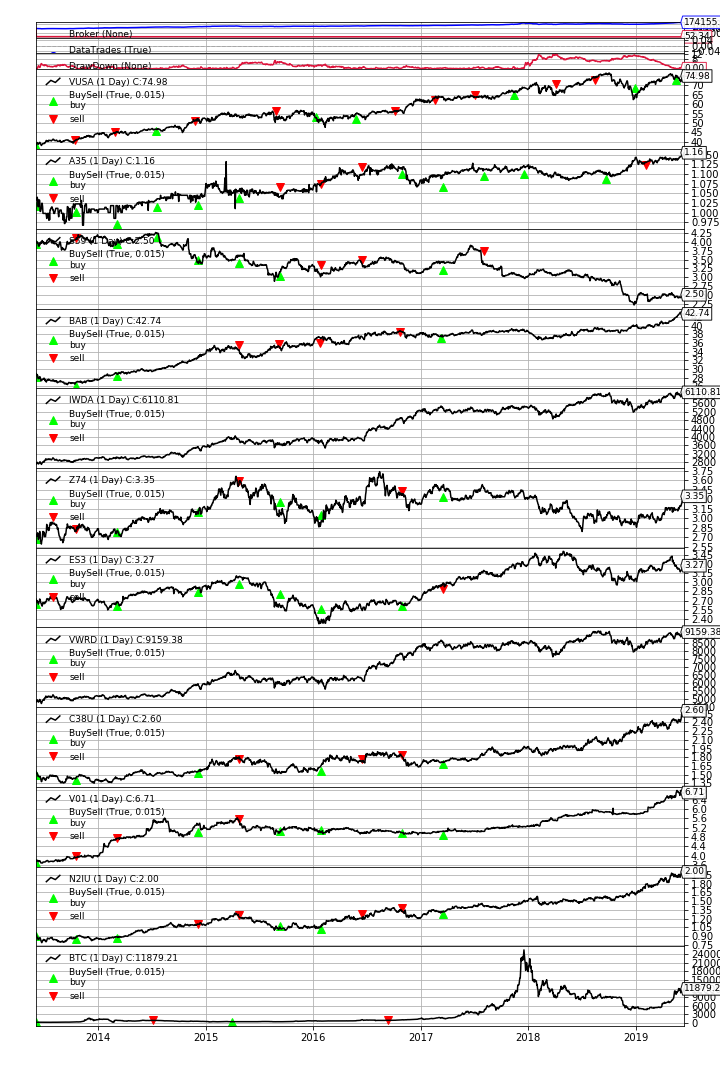

[[<Figure size 720x1080 with 15 Axes>]]

In [27]:
optimisedBtPlot()

In [17]:
totalValue = np.sum(currentReal)
optimisedRealAllocation = np.array(optimisedWeight)*totalValue
dict(zip(names, optimisedRealAllocation))

{'VUSA': 18667.484165242422,
 'A35': 11340.64075664058,
 'S59': 2213.2209935079454,
 'BAB': 34639.53311014825,
 'IWDA': 1498.8521675823617,
 'Z74': 1236.8213826626215,
 'ES3': 778.6178256880564,
 'VWRD': 9.245600649006183e-08,
 'C38U': 1557.7185143940067,
 'V01': 21966.151998696085,
 'N2IU': 7092.959085505811}

In [27]:
adjustments = np.array(optimisedWeight)*totalValue - np.array(currentReal)
dict(zip(names, adjustments))

{'VUSA': 8357.484165242422,
 'A35': -10892.35924335942,
 'S59': -606.7790064920546,
 'BAB': 9294.533110148252,
 'IWDA': -5606.147832417639,
 'Z74': -523.1786173373785,
 'ES3': -19717.382174311944,
 'VWRD': -6298.999999907544,
 'C38U': -38.28148560599334,
 'V01': 20570.151998696085,
 'N2IU': 5460.959085505811}

In [28]:
totalAdjustmentsToMake = np.sum(np.abs(adjustments))
totalAdjustmentsToMake

87366.25671902453